Naman Shrimal
21BTRCL069

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161568 entries, 0 to 161567
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       161568 non-null  datetime64[ns]
 1   Country    161568 non-null  object        
 2   Confirmed  161568 non-null  int64         
 3   Recovered  161568 non-null  int64         
 4   Deaths     161568 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 6.2+ MB
None
        Date      Country  Confirmed  Recovered  Deaths
0 2020-01-22  Afghanistan          0          0       0
1 2020-01-23  Afghanistan          0          0       0
2 2020-01-24  Afghanistan          0          0       0
3 2020-01-25  Afghanistan          0          0       0
4 2020-01-26  Afghanistan          0          0       0


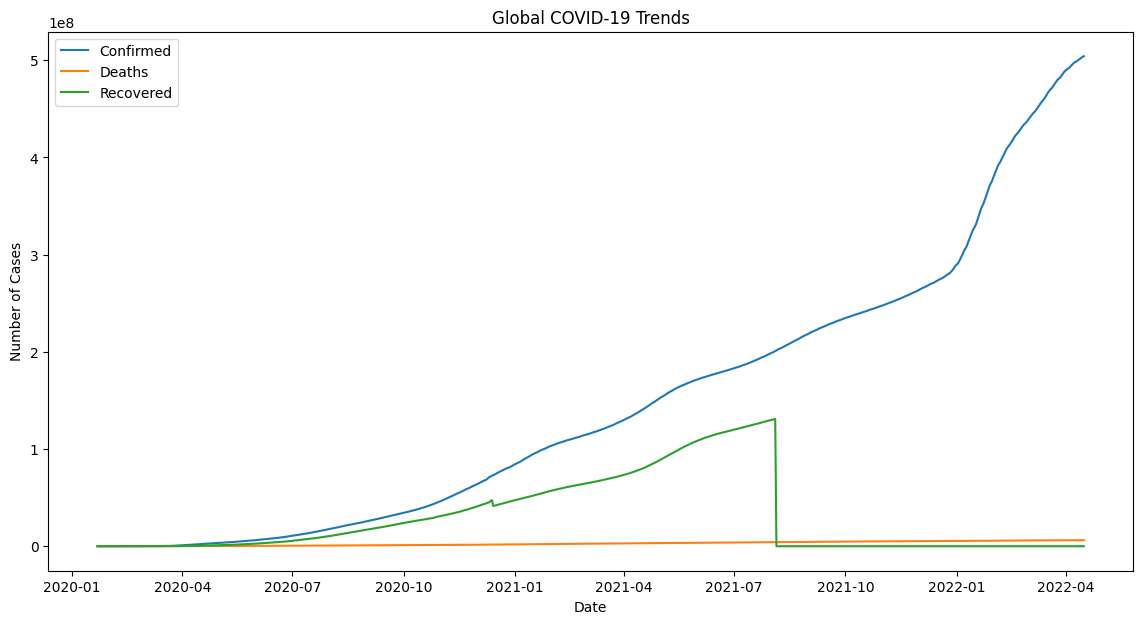

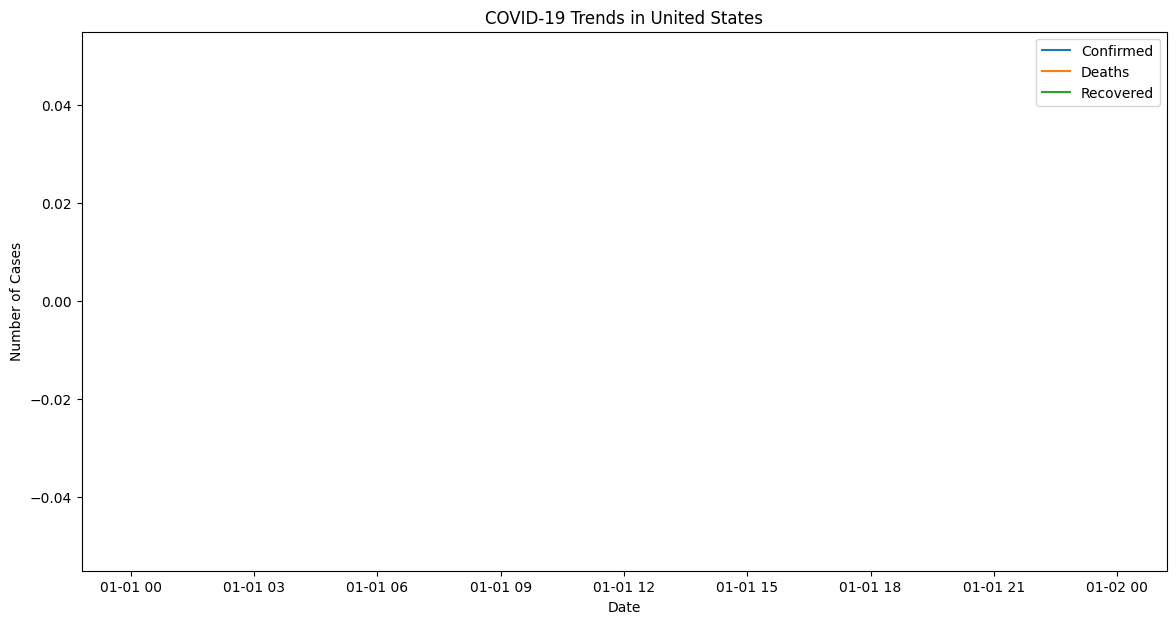

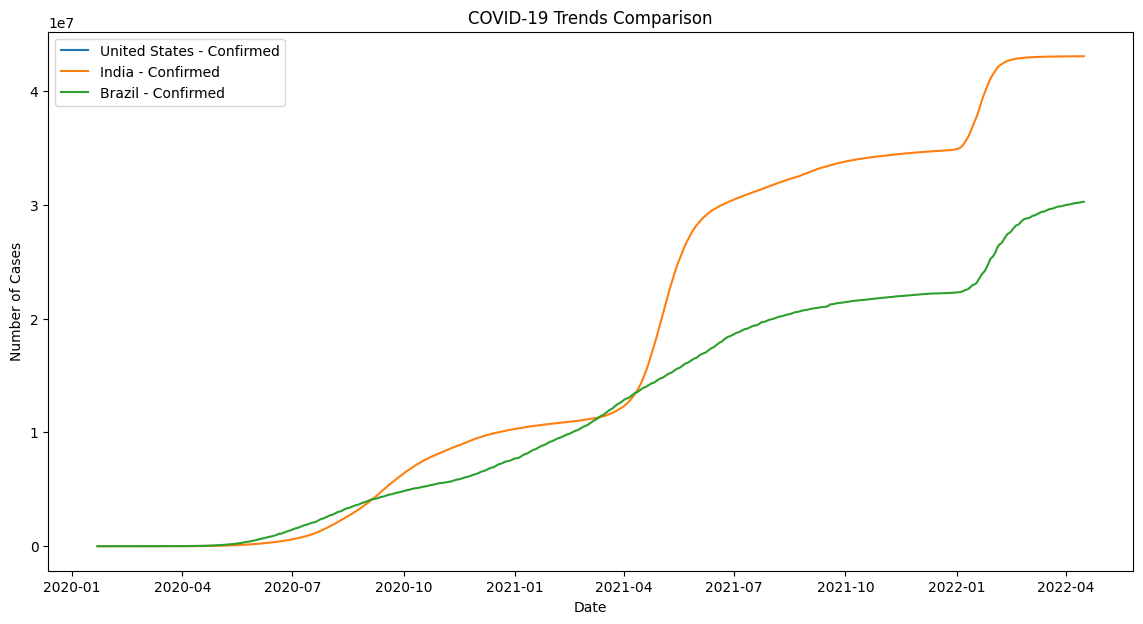

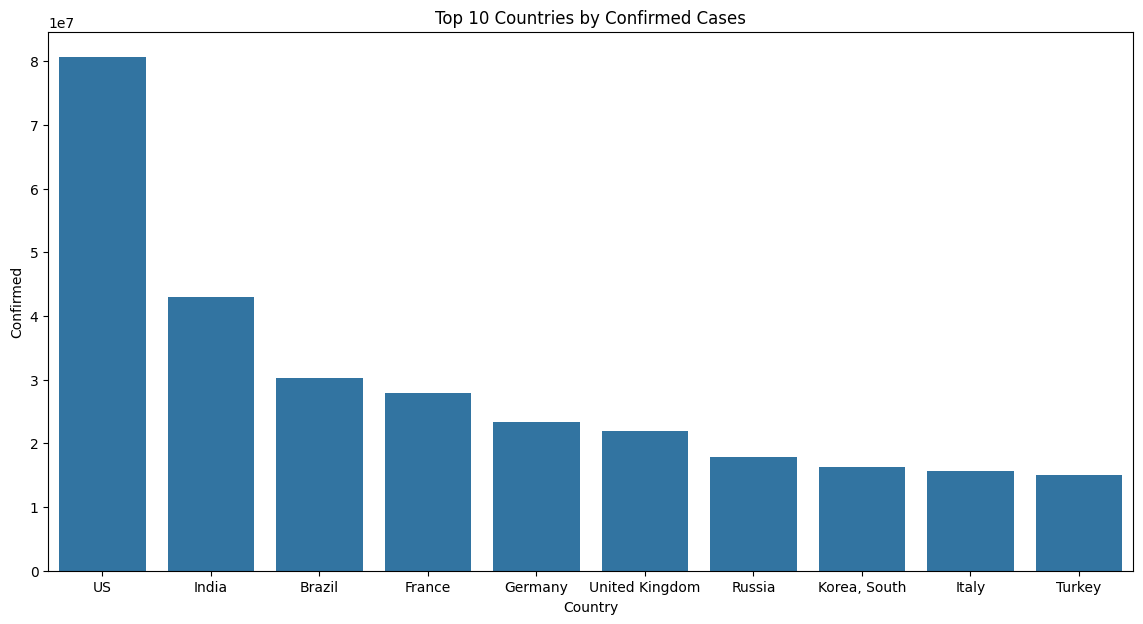

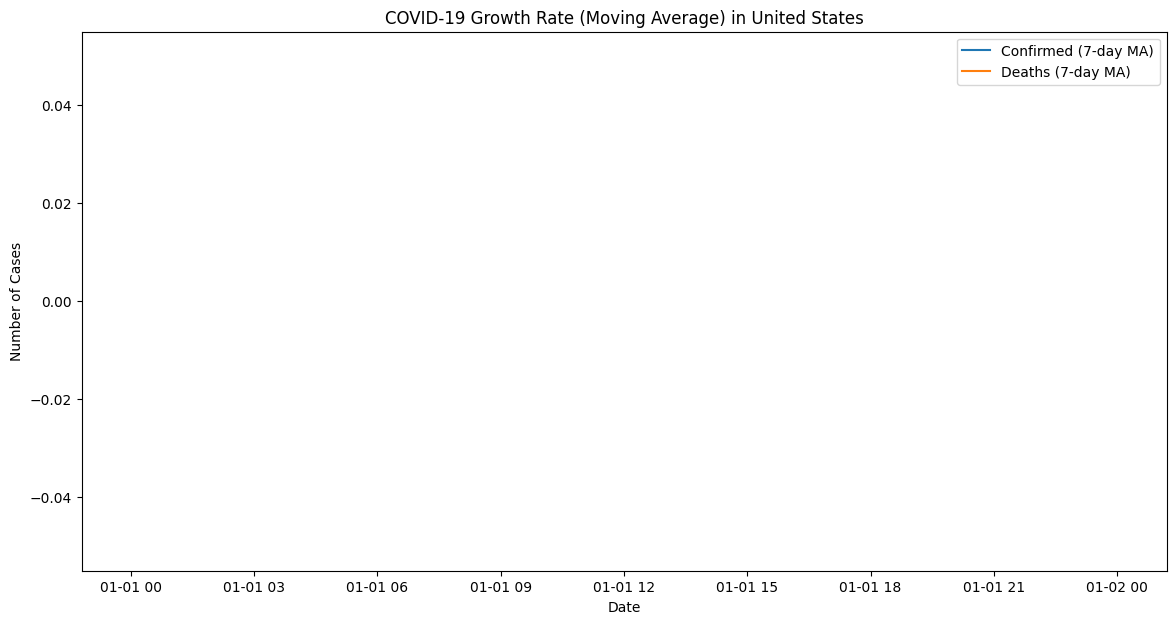

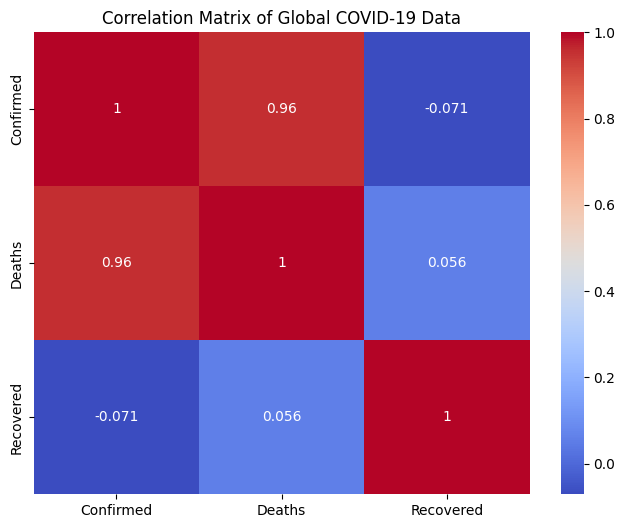

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv'
df = pd.read_csv(url)

print(df.isnull().sum())

df['Date'] = pd.to_datetime(df['Date'])

print(df.info())
print(df.head())

global_df = df.groupby('Date').sum().reset_index()

plt.figure(figsize=(14, 7))
plt.plot(global_df['Date'], global_df['Confirmed'], label='Confirmed')
plt.plot(global_df['Date'], global_df['Deaths'], label='Deaths')
plt.plot(global_df['Date'], global_df['Recovered'], label='Recovered')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('Global COVID-19 Trends')
plt.legend()
plt.show()

def plot_country_trends(country):
    country_df = df[df['Country'] == country]
    plt.figure(figsize=(14, 7))
    plt.plot(country_df['Date'], country_df['Confirmed'], label='Confirmed')
    plt.plot(country_df['Date'], country_df['Deaths'], label='Deaths')
    plt.plot(country_df['Date'], country_df['Recovered'], label='Recovered')
    plt.xlabel('Date')
    plt.ylabel('Number of Cases')
    plt.title(f'COVID-19 Trends in {country}')
    plt.legend()
    plt.show()

plot_country_trends('United States')

def compare_countries(countries):
    plt.figure(figsize=(14, 7))
    for country in countries:
        country_df = df[df['Country'] == country]
        plt.plot(country_df['Date'], country_df['Confirmed'], label=f'{country} - Confirmed')
    plt.xlabel('Date')
    plt.ylabel('Number of Cases')
    plt.title('COVID-19 Trends Comparison')
    plt.legend()
    plt.show()

compare_countries(['United States', 'India', 'Brazil'])

latest_df = df[df['Date'] == df['Date'].max()]

top10_df = latest_df.nlargest(10, 'Confirmed')

plt.figure(figsize=(14, 7))
sns.barplot(x='Country', y='Confirmed', data=top10_df)
plt.title('Top 10 Countries by Confirmed Cases')
plt.show()

df['Confirmed_MA'] = df.groupby('Country')['Confirmed'].transform(lambda x: x.rolling(window=7).mean())
df['Deaths_MA'] = df.groupby('Country')['Deaths'].transform(lambda x: x.rolling(window=7).mean())

country = 'United States'
country_df = df[df['Country'] == country]

plt.figure(figsize=(14, 7))
plt.plot(country_df['Date'], country_df['Confirmed_MA'], label='Confirmed (7-day MA)')
plt.plot(country_df['Date'], country_df['Deaths_MA'], label='Deaths (7-day MA)')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title(f'COVID-19 Growth Rate (Moving Average) in {country}')
plt.legend()
plt.show()

correlation_matrix = global_df[['Confirmed', 'Deaths', 'Recovered']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Global COVID-19 Data')
plt.show()